## We need graphviz for visualization

There's a [tutorial](https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software) to help with the installation, specially the extra stuff needed for `Windows` or `OSX`.

In [ ]:
!pip install graphviz # graphviz for python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearn import tree, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Decision trees

Example from `sklearn`

In [2]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=123)

In [3]:
clf = tree.DecisionTreeClassifier(max_depth=2)

clf.fit(X_train, y_train);

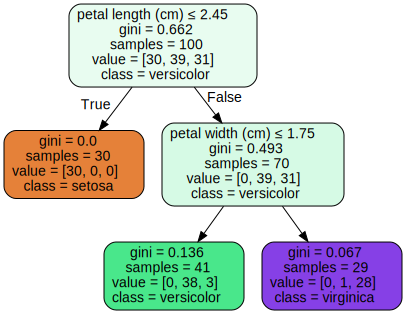

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

graphviz.Source(dot_data)

In [5]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       0.93      0.97      0.95        39
   virginica       0.97      0.90      0.93        31

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



### Increasing the depth...

In [6]:
clf = tree.DecisionTreeClassifier(max_depth=None)

clf.fit(X_train, y_train);

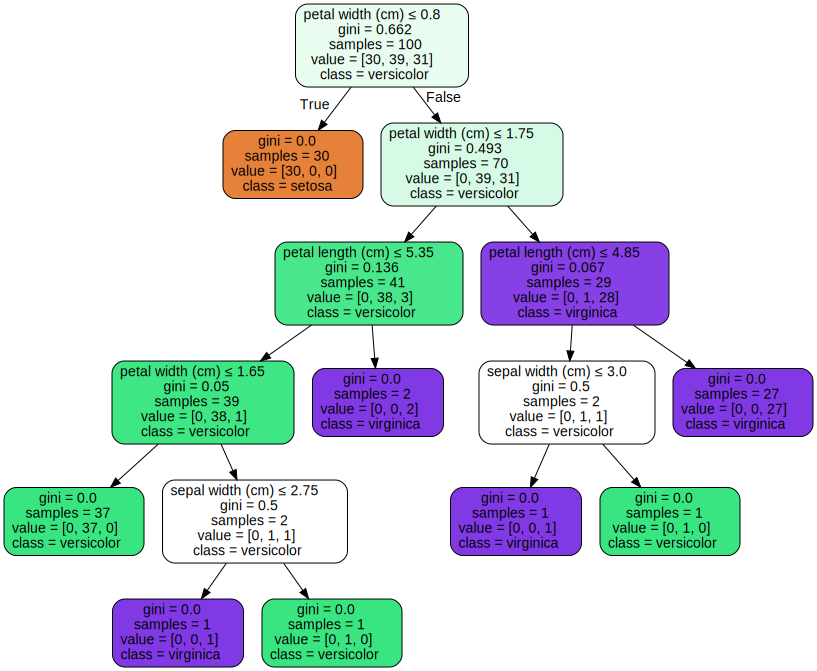

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

graphviz.Source(dot_data)

In [8]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
  versicolor       1.00      1.00      1.00        39
   virginica       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### And what if we look at the accuracy over the test data?

In [9]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



## Regression Trees

In [10]:
boston = datasets.load_boston()

# Only using the LSTAT feature (percentage of lower status of the population)
X = boston.data[:, boston.feature_names == 'LSTAT']
y = boston.target

# Sort X and y by ascending values of X
sort_idx = X.flatten().argsort()
X = X[sort_idx].reshape(-1, 1)
y = y[sort_idx]

In [11]:
clf = tree.DecisionTreeRegressor(max_depth=3, criterion='mse')

clf.fit(X, y);

### What do the leafs return in this case?

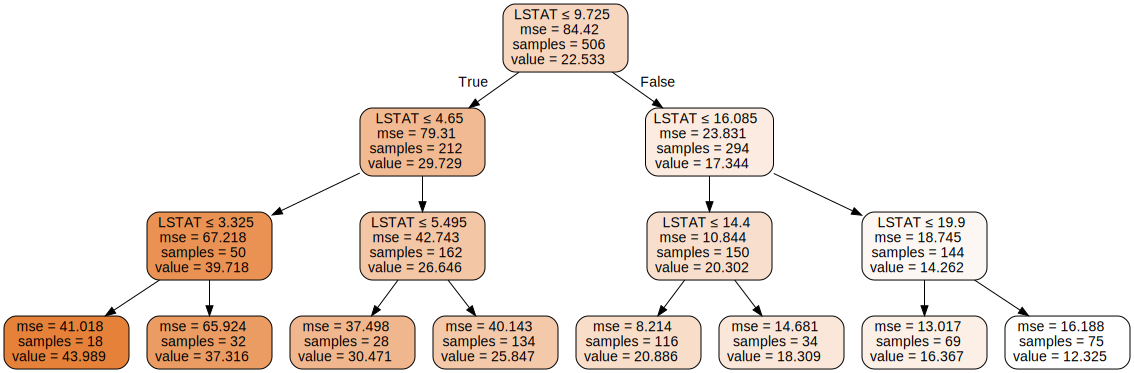

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['LSTAT'],
                                filled=True, rounded=True,
                                special_characters=True)

graphviz.Source(dot_data)

### Let's check it out

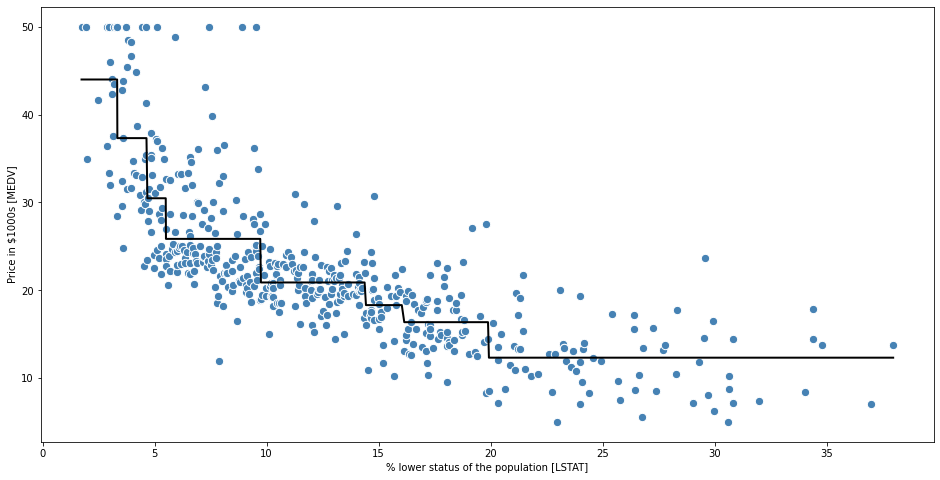

In [13]:
plt.figure(figsize=(16, 8))

plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, clf.predict(X), color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()